In [2]:
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers

### Tutorial 1
#### nltk.corpus import subjectivity
http://www.nltk.org/howto/sentiment.html

In [3]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(100, 100)

In [5]:
subj_docs[0]

(['smart',
  'and',
  'alert',
  ',',
  'thirteen',
  'conversations',
  'about',
  'one',
  'thing',
  'is',
  'a',
  'small',
  'gem',
  '.'],
 'subj')

In [6]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

In [7]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)

83

In [8]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

In [9]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

In [10]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Training classifier


In [11]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [12]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


In [13]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
...    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
...    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
...    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
...    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
...    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
...    "The book was good.",         # positive sentence
...    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
...    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
...    "A really bad, horrible book.",       # negative sentence with booster words
...    "At least it isn't a horrible book.", # negated negative sentence with contraction
...    ":) and :D",     # emoticons handled
...    "",              # an empty string is correctly handled
...    "Today sux",     #  negative slang handled
...    "Today sux!",    #  negative slang with punctuation emphasis handled
...    "Today SUX!",    #  negative slang with capitalization emphasis
...    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
... ]

In [15]:
paragraph = "It was one of the worst movies I've seen, despite good reviews. \
... Unbelievably bad acting!! Poor direction. VERY poor production. \
... The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

In [16]:
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)

In [17]:
tricky_sentences = [
...    "Most automated sentiment analysis tools are shit.",
...    "VADER sentiment analysis is the shit.",
...    "Sentiment analysis has never been good.",
...    "Sentiment analysis with VADER has never been this good.",
...    "Warren Beatty has never been so entertaining.",
...    "I won't say that the movie is astounding and I wouldn't claim that \
...    the movie is too banal either.",
...    "I like to hate Michael Bay films, but I couldn't fault this one",
...    "It's one thing to watch an Uwe Boll film, but another thing entirely \
...    to pay for it",
...    "The movie was too good",
...    "This movie was actually neither that funny, nor super witty.",
...    "This movie doesn't care about cleverness, wit or any other kind of \
...    intelligent humor.",
...    "Those who find ugly meanings in beautiful things are corrupt without \
...    being charming.",
...    "There are slow and repetitive parts, BUT it has just enough spice to \
...    keep it interesting.",
...    "The script is not fantastic, but the acting is decent and the cinematography \
...    is EXCELLENT!",
...    "Roger Dodger is one of the most compelling variations on this theme.",
...    "Roger Dodger is one of the least compelling variations on this theme.",
...    "Roger Dodger is at least compelling as a variation on the theme.",
...    "they fall in love with the product",
...    "but then it breaks",
...    "usually around the time the 90 day warranty expires",
...    "the twin towers collapsed today",
...    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
...    under orders and in the ''least offensive way possible.''"
... ]

sentences.extend(tricky_sentences)

In [18]:
sid = SentimentIntensityAnalyzer()

In [19]:
for sentence in sentences:
...     print(sentence)
...     ss = sid.polarity_scores(sentence)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
At least it isn't a horrible book.
compound

### Tutorial 1 -- sentences on /r/Anxiety/
#### nltk.corpus import subjectivity
http://www.nltk.org/howto/sentiment.html

In [20]:
df1 = pd.read_csv('s_med.csv')

In [21]:
df1.columns

Index(['Unnamed: 0', 'colummn'], dtype='object')

In [22]:
sent_a = list(df1['colummn'].values)

In [23]:
print(len(sent_a))

37709


In [24]:
res_s_dic = []

for sentence in sent_a:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    res_s_dic.append(ss)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

I have a feeling that this will only get worse from now on since she's also looking up all sorts of alternative medicine bullshit for OCD now...
compound: -0.7506, neg: 0.227, neu: 0.724, pos: 0.049, 
I'm not sure where to start.
compound: -0.2411, neg: 0.282, neu: 0.718, pos: 0.0, 
I've been lurking here for a while and I guess I finally felt the need to post.
compound: -0.128, neg: 0.103, neu: 0.897, pos: 0.0, 
I'll start by saying I'm 34 with 2 beautiful daughters.
compound: 0.5994, neg: 0.0, neu: 0.672, pos: 0.328, 
They've helped me more than anytning.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I've had several failed marriages.
compound: -0.5106, neg: 0.452, neu: 0.548, pos: 0.0, 
They ended either from them cheating or abuse.
compound: -0.8316, neg: 0.565, neu: 0.435, pos: 0.0, 
I always tried the best I could and it was never good enough.
compound: 0.4203, neg: 0.154, neu: 0.577, pos: 0.269, 
I'm not very social.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
My anxiety creat

In [25]:
s_format = sid.polarity_scores(sent_a[0])
print (s_format)
print (s_format['neg'])
print (s_format['pos'])
print (s_format['neu'])

{'neg': 0.227, 'neu': 0.724, 'pos': 0.049, 'compound': -0.7506}
0.227
0.049
0.724


#### box plot
http://seaborn.pydata.org/generated/seaborn.boxplot.html

In [26]:
print(res_s_dic)

[{'neg': 0.227, 'neu': 0.724, 'pos': 0.049, 'compound': -0.7506}, {'neg': 0.282, 'neu': 0.718, 'pos': 0.0, 'compound': -0.2411}, {'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.128}, {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.5994}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5106}, {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.8316}, {'neg': 0.154, 'neu': 0.577, 'pos': 0.269, 'compound': 0.4203}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.232, 'neu': 0.476, 'pos': 0.292, 'compound': 0.25}, {'neg': 0.253, 'neu': 0.632, 'pos': 0.115, 'compound': -0.34}, {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}, {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}, {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.8271}, {'neg': 0.081, 'neu

In [30]:
df_res_s = pd.DataFrame(res_s_dic)
print (df_res_s)

       compound    neg    neu    pos
0       -0.7506  0.227  0.724  0.049
1       -0.2411  0.282  0.718  0.000
2       -0.1280  0.103  0.897  0.000
3        0.5994  0.000  0.672  0.328
4        0.0000  0.000  1.000  0.000
5       -0.5106  0.452  0.548  0.000
6       -0.8316  0.565  0.435  0.000
7        0.4203  0.154  0.577  0.269
8        0.0000  0.000  1.000  0.000
9        0.2500  0.232  0.476  0.292
10      -0.3400  0.253  0.632  0.115
11      -0.3400  0.211  0.789  0.000
12       0.5719  0.000  0.619  0.381
13       0.4215  0.000  0.843  0.157
14       0.0000  0.000  1.000  0.000
15      -0.8271  0.492  0.508  0.000
16       0.2960  0.081  0.791  0.128
17      -0.3612  0.556  0.444  0.000
18      -0.9398  0.366  0.563  0.070
19       0.5927  0.000  0.851  0.149
20       0.0000  0.000  1.000  0.000
21       0.8534  0.032  0.770  0.198
22       0.0000  0.000  1.000  0.000
23       0.6908  0.000  0.695  0.305
24       0.4404  0.000  0.794  0.206
25      -0.0900  0.083  0.917  0.000
2

In [28]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

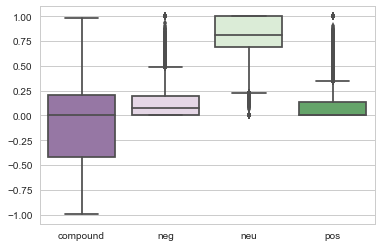

In [32]:
ax = sns.boxplot(data= df_res_s,palette="PRGn")

### Tutorial 1 -- posts on /r/Anxiety/
#### nltk.corpus import subjectivity
http://www.nltk.org/howto/sentiment.html